# **How to Run Notebook**
---


1. Set up `virtual conda environment` if you have not already done so. Uncomment to run.

In [ ]:
# !conda create conda create ../environments/environment.yml --no-builds
# !conda activate TILSEG_PROJECT2024
# !cd TILSEG_PROJECT2024

2. Update the `respository_path` variable to use the 'TILSEG_PROJECT2024' Cloned Github Folder path. 
This path is needed to access the example files used in the notebook.

In [9]:
import os
directory_path = os.getcwd()
repository_path = os.path.dirname(directory_path)

3. Run the `Initalization Block`. This is necessary as Python adds a directory for this notebook to the list of locations where modules can be searched from when importing.

In [10]:
import sys
sys.path.append(repository_path)

4. Import the needed modules in the `Import Block`

In [11]:
# External library imports
import matplotlib.pyplot as plt
import numpy as np

# Core Features
---

### The TILSEG_PROJECT2024 software package is intended for use in breast cancer slide segmentation analysis, aimed at accelerating breast cancer detection. This package consists for 4 main branches:

### 1. <u>Preprocessing (preprocessing.py):</u>
#### creates superpatch .tif file from cropped 3000 by 4000 pixel patches from a stained breast cancer slide. The original image is segmented into all possible patches where a select number (default: 6) are chosen that represent different sections of grays scales from a guassian distribution.

<img src= "Notebook_Images/Image_7.png" style="width: 600px;">
<img src= "Notebook_Images/image_8.png" style="width: 597px;">

### 2. <u>Image Segmentation / Kmeans Clustering</u>
#### seg.py --> def segment_TILs

## 1) Pre-Preprocessing Step on Slide Image

In [12]:
from tilseg.preprocessing import preprocess
path = repository_path + '/Example/Image Files/Slide Files'
superpatch = preprocess(path, patches=6, training=True, save_im=True)

/Users/laurenfrank/TILseg_Project2024/Example/Image Files/Slide Files/TCGA-A2-A0CW-01Z-00-DX1.svs
Percent of pixels lost in pre-processing for TCGA-A2-A0CW-01Z-00-DX1.svs:                       1.7593642775049286e-06 %


| Before     | After    |
|--------------|--------------|
| <img src= "Notebook_Images/Image_4.png" style="width: 150px;">, <span style="font-size: 6em;">&rarr;</span> <img src= "Notebook_Images/Image_5.png" style="width: 170px;"> | <img src= "Notebook_Images/Image_4.png" style="width: 150px;">, <span style="font-size: 6em;">&rarr;</span> <img src= "Notebook_Images/Image_6.png" style="width: 500px;"> |


## 2) Single Image (Testing Model Accuracy)

### - Running Segment_TILS on Single Patch - KMeans Only

#### Preview Patch
    position_7_8tissues.tif

In [33]:
image = Image.open('comparison/TCGA-A2-A0CW-01Z-00-DX1/position_7_8tissue.tif')
display(image)

FileNotFoundError: [Errno 2] No such file or directory: 'comparison/TCGA-A2-A0CW-01Z-00-DX1/position_7_8tissue.tif'

#### Run segment_TILS
    Applies a clustering model to patches and generates multiple files: TILs
    overlayed on the original H&E patch, binary segmentation masks of each
    cluster, individual clusters overlayed on the original patch, image of all
    the clusters, and a CSV file containing countour information of each TIL
    segmented from the patch. These images are saved locally inside a "ClusteringResults" 
    folder for each image.

In [32]:
from tilseg.seg import segment_TILs
from tilseg.model_selection import opt_kmeans
from tilseg.refine_kmeans import KMeans_superpatch_fit

#Opens Superpatch Image / Retrieves Pixel Data
superpatch_path = 'comparison/superpatch_training.tif'
img = Image.open(superpatch_path)
numpy_img = np.array(img)
numpy_img_reshape = np.float32(numpy_img.reshape((-1, 3))/255.)

hyperparameter_dict = opt_kmeans(numpy_img_reshape,n_clusters = [1,2,3,4,6,7,8])
kmeans_fit = KMeans_superpatch_fit(superpatch_path,hyperparameter_dict)

TIL_count_dict, kmean_labels_dict, cluster_mask_dict = segment_TILs(in_dir_path = repository_path + '/Example/comparison/TCGA-A2-A0CW-01Z-00-DX1/position_7_8tissue.tif',
                                                        out_dir_path = repository_path + '/Example/comparison',
                                                        hyperparameter_dict = None,
                                                        algorithm = 'KMeans',
                                                        model = kmeans_fit,
                                                        save_TILs_overlay = True,
                                                        save_cluster_masks = True,
                                                        save_cluster_overlays = True,
                                                        save_all_clusters_img = True,
                                                        save_csv = True,
                                                        multiple_images = False)

In [ ]:
#Contour
from PIL import Image
import matplotlib.pyplot as plt

# Open the images
image1 = Image.open('comparison/TCGA-A2-A0CW-01Z-00-DX1/position_7_8tissue.tif')
image2 = Image.open('path_to_second_image')
image3 = Image.open('path_to_third_image')

# Create a figure and axis objects
fig, axs = plt.subplots(3, 1, figsize=(8, 8))

# Display the images on separate axes
axs[0].imshow(image1)
axs[0].axis('off')
axs[0].set_title('Image 1')

axs[1].imshow(image2)
axs[1].axis('off')
axs[1].set_title('Image 2')

axs[2].imshow(image3)
axs[2].axis('off')
axs[2].set_title('Image 3')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the images
plt.show()

### Running Kmeans-Dbscan Model on Same Patch - Kmeans fed into Dbscan

## 3) Multiple Images (Predicting Superpatch Model on Superpatches)

### Running Segment_TILS on Folder of Patches from Slide - KMeans Only

### Running Kmeans-Dbscan Model on Superpatch and Folder of Patches - KMeans fed into Dbscan

Found hyperparameters. Time took: 3.2815717180569965 minutes.
Completed Kmeans fitting. Time took: 0.7059892137845357 minutes.


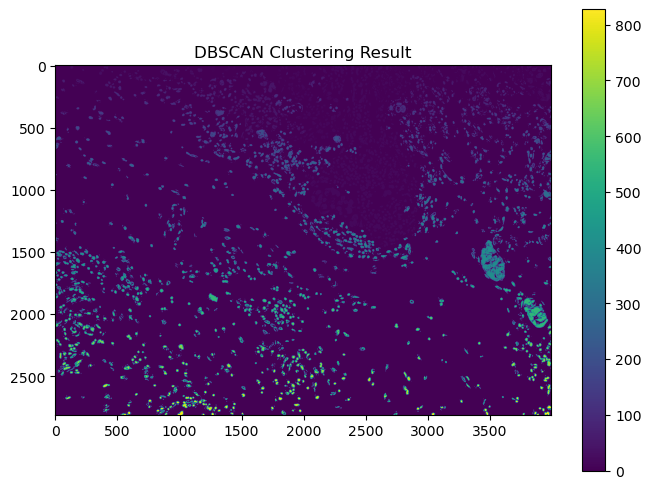

Script completed. Dbscan fitting time: 19.35512113571167 seconds.


In [4]:
from tilseg.seg import kmean_to_spatial_model_superpatch_wrapper
im_labels, dbscan_model, cluster_mask_dict = kmean_to_spatial_model_superpatch_wrapper(superpatch_path = '/Users/laurenfrank/TILseg_Project2024/Example/Image Files/superpatch_training.tif',
                                            in_dir_path = '/Users/laurenfrank/TILseg_Project2024/Example/Image Files/TCGA-A2-A0CW-01Z-00-DX1',
                                            spatial_hyperparameters= {'eps': 15,'min_samples': 100},
                                            n_clusters = [1,2,4,5,6,7,8,9],
                                            out_dir_path = '/Users/laurenfrank/TILseg_Project2024/Example/Results',
                                            save_TILs_overlay = True,
                                            save_cluster_masks = True,
                                            save_cluster_overlays =  True,
                                            save_all_clusters_img = True,
                                            save_csv = True)

CLustering Results should have been saved to the `Results Folder`

<img title="a title" alt="Alt text" src="Notebook_Images/Image_1.png" width="200">  
<span style="font-size: 6em;">&rarr;</span>
<img title="a title" alt="Alt text" src="Notebook_Images/image_2.png" width="200">
<span style="font-size: 6em;">&rarr;</span>
<img title="a title" alt="Alt text" src="Notebook_Images/image_3.png" width="600">

### BREAK